<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


{'Gender': array(['Male', 'Female'], dtype=object),
 'Occupation': array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
        'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
        'Salesperson', 'Manager'], dtype=object),
 'BMI Category': array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object),
 'Sleep Disorder': array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object),
 'Blood Pressure': array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
        '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
        '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
        '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
        '118/75'], dtype=object)}

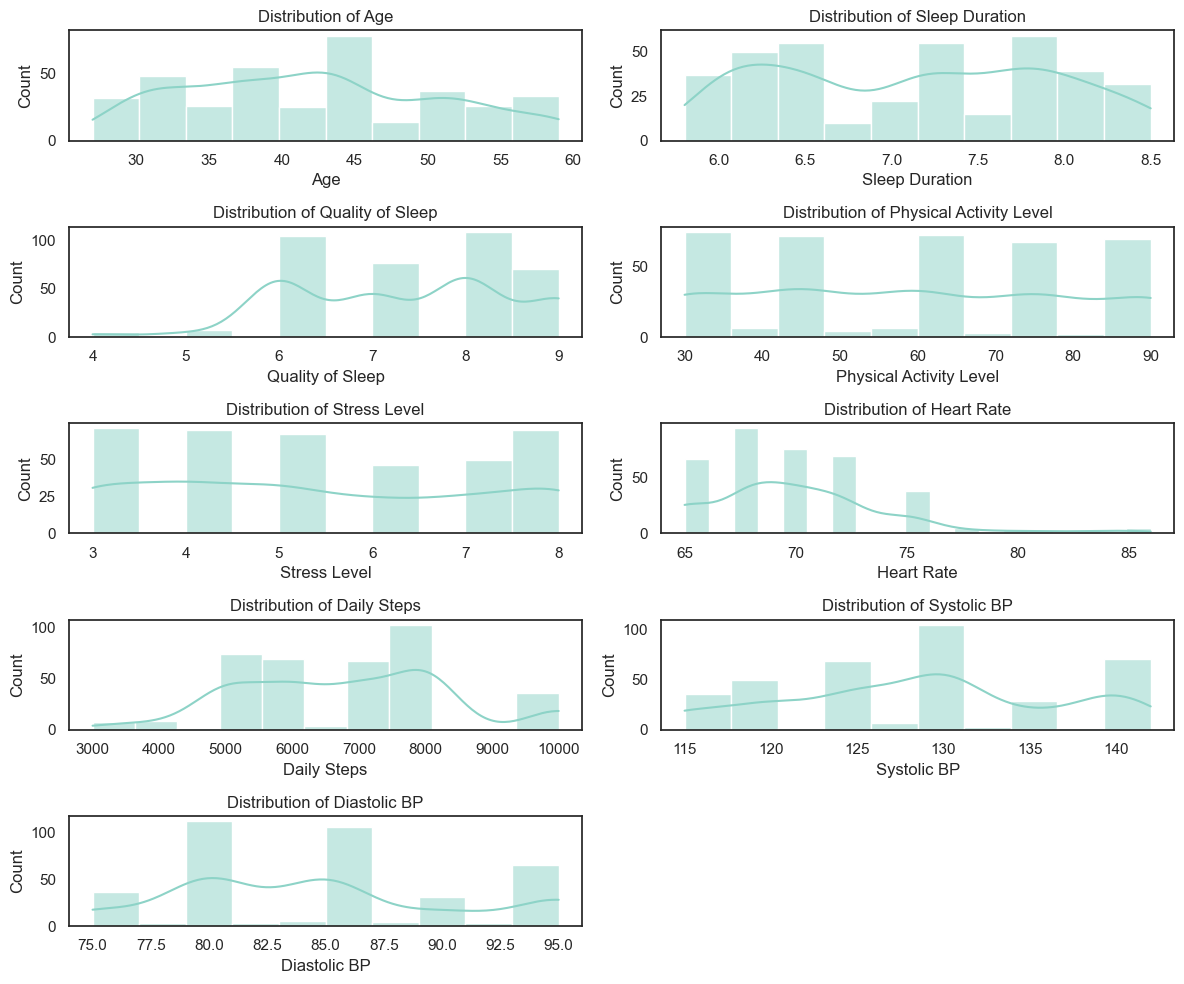

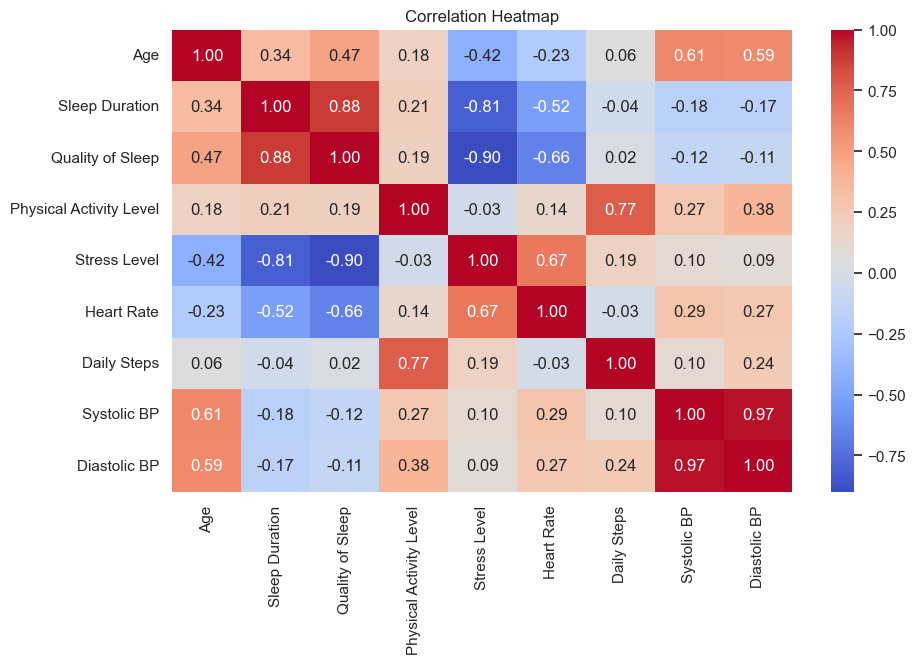

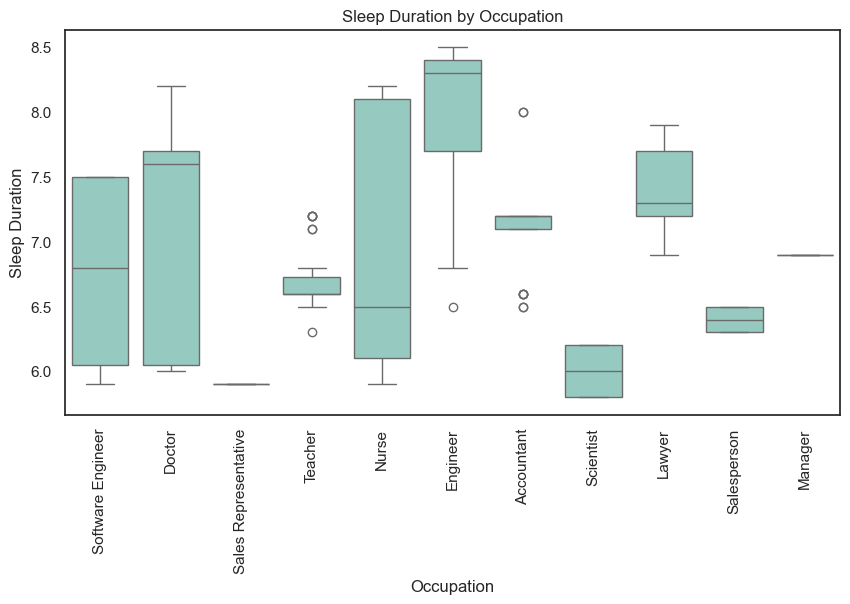

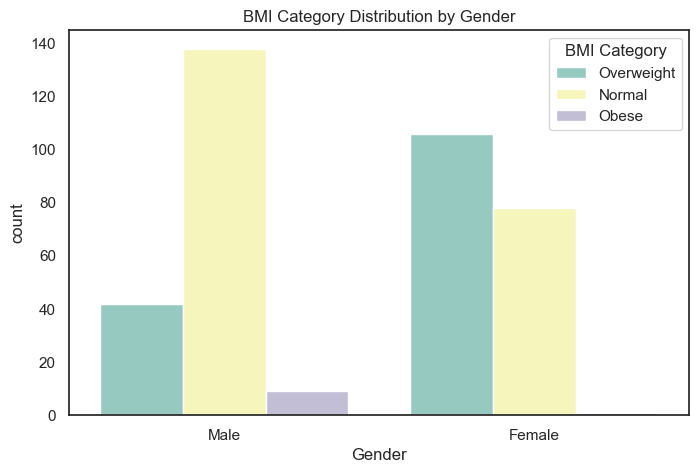

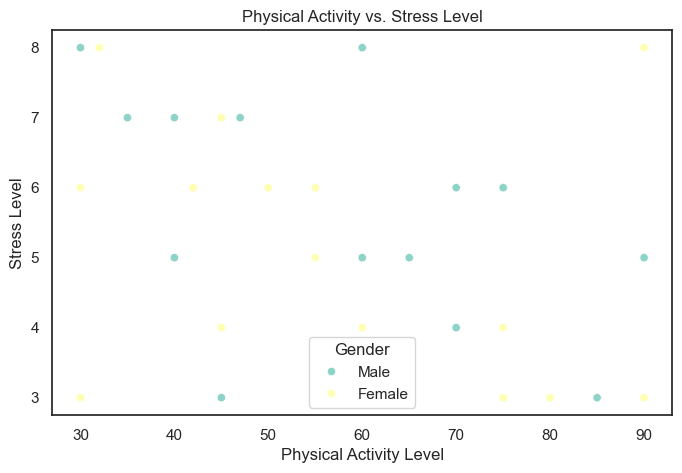

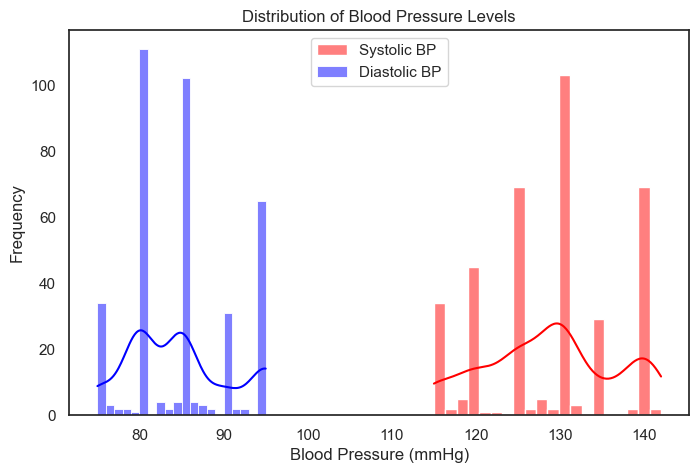

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("data.csv")

# Display basic info
print(data.info())

# Descriptive statistics
descriptive_stats = data.describe()

# Unique values in categorical columns
cat_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder', 'Blood Pressure']
unique_values = {col: data[col].unique() for col in cat_columns}

# Display results
display(descriptive_stats, unique_values)

# Correct inconsistencies in 'BMI Category'
data['BMI Category'] = data['BMI Category'].replace({'Normal Weight': 'Normal'})

# Splitting 'Blood Pressure' into 'Systolic' and 'Diastolic' columns
if 'Blood Pressure' in data.columns:
    data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True)
    data['Systolic BP'] = pd.to_numeric(data['Systolic BP'], errors='coerce')
    data['Diastolic BP'] = pd.to_numeric(data['Diastolic BP'], errors='coerce')

# Drop unnecessary columns
data.drop(['Blood Pressure', 'Person ID'], axis=1, inplace=True, errors='ignore')

# Set Seaborn style
sns.set(style="white")
sns.set_palette("Set3")

# List of numerical variables
num_vars = data.select_dtypes(include=['int64', 'float64']).columns

# Histogram for numerical variables
fig, axes = plt.subplots(nrows=(len(num_vars) + 1) // 2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(num_vars):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[num_vars].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Boxplot for Sleep Duration by Occupation
plt.figure(figsize=(10, 5))
sns.boxplot(x="Occupation", y="Sleep Duration", data=data)
plt.xticks(rotation=90)
plt.title("Sleep Duration by Occupation")
plt.show()

# Count plot for BMI Category by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender", hue="BMI Category", data=data)
plt.title("BMI Category Distribution by Gender")
plt.show()

# Scatter plot: Physical Activity vs. Stress Level
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Physical Activity Level", y="Stress Level", hue="Gender", data=data)
plt.title("Physical Activity vs. Stress Level")
plt.xlabel("Physical Activity Level")
plt.ylabel("Stress Level")
plt.show()

# Blood Pressure Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Systolic BP'].dropna(), bins=20, kde=True, color='red', label='Systolic BP')
sns.histplot(data['Diastolic BP'].dropna(), bins=20, kde=True, color='blue', label='Diastolic BP')
plt.legend()
plt.title("Distribution of Blood Pressure Levels")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.show()

LogisticRegression Cross-Validation F1_weighted: 0.89 +/- 0.05
LogisticRegression Classification Report:
              precision    recall  f1-score   support

        None       0.77      0.87      0.82        23
 Sleep Apnea       0.71      0.83      0.77        24
    Insomnia       0.98      0.88      0.93        66

    accuracy                           0.87       113
   macro avg       0.82      0.86      0.84       113
weighted avg       0.88      0.87      0.87       113

RidgeClassifier Cross-Validation F1_weighted: 0.88 +/- 0.06
RidgeClassifier Classification Report:
              precision    recall  f1-score   support

        None       0.76      0.83      0.79        23
 Sleep Apnea       0.75      0.88      0.81        24
    Insomnia       0.98      0.89      0.94        66

    accuracy                           0.88       113
   macro avg       0.83      0.87      0.85       113
weighted avg       0.89      0.88      0.88       113

SVC Cross-Validation F1_weighted: 

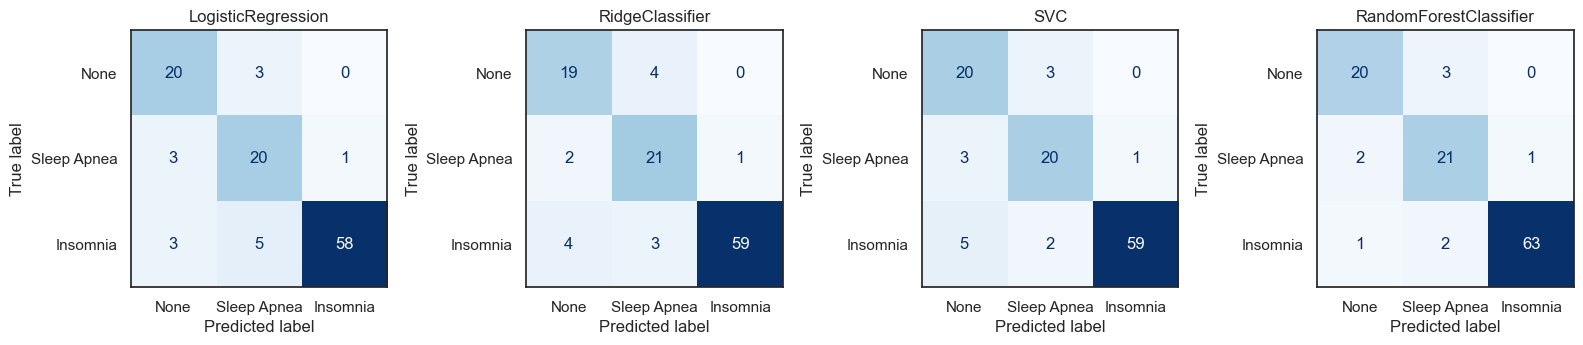

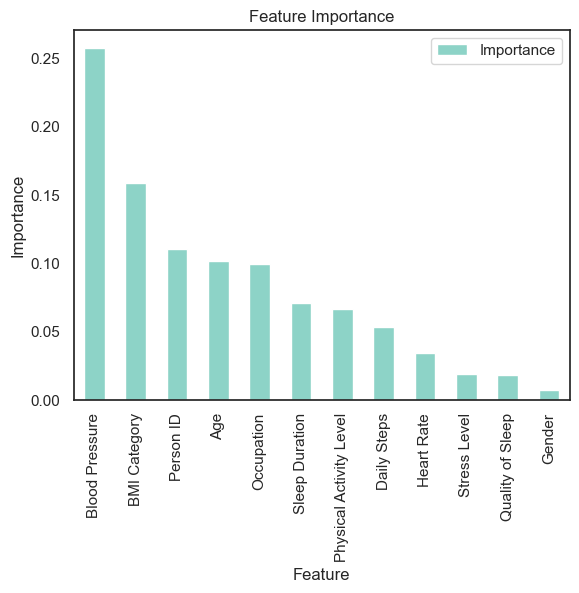

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
data = pd.read_csv("data.csv")

# Prepare features and target
X = data.drop(['Sleep Disorder'], axis=1)
y = data['Sleep Disorder']

# Label encoding for categorical variables
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encoding the target variable
y = LabelEncoder().fit_transform(y)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Applying StandardScaler to numerical variables
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
num_vars = X.select_dtypes(include=['int64', 'float64']).columns
X_train_scaled[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test_scaled[num_vars] = scaler.transform(X_test[num_vars])

# Model training and validation
def train_and_cross_validate(model, X_train, y_train, cv=5):
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted')
    print(f"{model.__class__.__name__} Cross-Validation F1_weighted: {np.mean(scores):.2f} +/- {np.std(scores):.2f}")
    model.fit(X_train, y_train)
    return model

# Evaluate models and plot confusion matrix
def evaluate_and_plot_confusion_matrix(model, X_test, y_test, class_names, ax):
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    disp.im_.colorbar.remove()
    ax.set_title(f"{model.__class__.__name__}")

# Define class names and models
class_names = ['None', 'Sleep Apnea', 'Insomnia']
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, class_weight='balanced'),
    "Ridge Classifier": RidgeClassifier(class_weight='balanced'),
    "SVM": SVC(class_weight='balanced', kernel='linear'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

# Train and evaluate models
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes = axes.flatten()
for i, (name, model) in enumerate(models.items()):
    trained_model = train_and_cross_validate(model, X_train_scaled if name in ["Logistic Regression", "Ridge Classifier", "SVM"] else X_train, y_train)
    evaluate_and_plot_confusion_matrix(trained_model, X_test_scaled if name in ["Logistic Regression", "Ridge Classifier", "SVM"] else X_test, y_test, class_names, axes[i])
plt.tight_layout()
plt.show()

# Train RandomForestClassifier and extract feature importance
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',  # FIXED HERE
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=50
).fit(X_train, y_train)

feature_importances = rf.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

features_df.sort_values(by='Importance', ascending=False).plot(x='Feature', y='Importance', kind='bar')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()
